# Digit Recognizer with torch
Objectif : Prendre en main la librairie PyTorch afin d'entrainer et de valider un modèle sur la reconnaissance d'écriture de chiffres entre 0 et 9

In [29]:
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

## Récupération des données

- Utilisation du module datasets de torchvision pour obtenir les images des chiffres écrits à la main
- Division du datasets en données "d'entrainement" et données de "test"
- Séparation en batch pour faciliter la convergence 

In [30]:
# Transform each image into tensor and normalized with mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Define the batch size used each time we go through the dataset
batch_size = 32

# Set the training loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
# Set the testing loader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=transform), batch_size=batch_size, shuffle=True)

## Visualisation des données sous forme d'image 

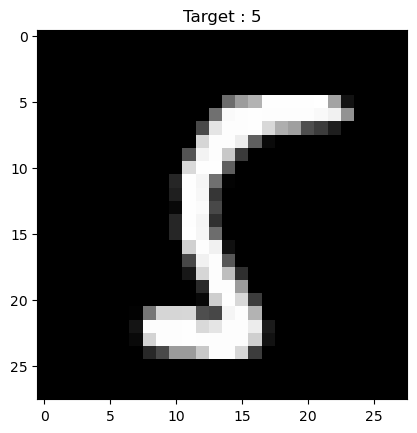

In [46]:
data_iter = iter(test_loader)
data, targets = next(data_iter)
plt.imshow(data[0].view(28, 28), cmap="gray")
plt.title("Target : {}".format(targets[0]))
plt.show()

## Entrainement du modèle 
 - Initialisation des poids (1 poids pour chaque pixel)
 - Réseau de neurones linéaires : entrées=784 | sortie=10
 - Utilisation de la fonction d'activation : log_softmax
 - Calcul de la perte avec NLL (Négative Log Likelyhood)

In [31]:
## Init weights
# 784 because there is 784 pixels in each image
# 10 because there is 10 possible outputs : 0,1,2,3,4,5,6,7,8,9
# Each pixel is linked to 10 outputs where each link is a weight to optimize\
# <=> Each class is linked to 784 pixel where each link is a weight to optimize
weights = torch.randn(784, 10, requires_grad=True)

In [41]:
it=0

for batch_idx, (data,targets) in enumerate(train_loader):
    # Be sure to start the loop with zeros grad
    if weights.grad is not None:
        weights.grad.zero_()
        
    data=data.view(-1,28*28) #Transformation d'une matrice 28x28 par une array de 784 valeurs 

    outputs=torch.matmul(data,weights) #Multiplication matricielle de data [32,784] par weights [784,10]
    
    log_softmax = F.log_softmax(outputs, dim=1)
    
    loss = F.nll_loss(log_softmax, targets)
    print("\rBatch ID : {} , Loss shape: {}".format(batch_idx,loss), end="")
    
    # Compute the gradients for each variables
    loss.backward()
    
    with torch.no_grad():
        weights -= 0.1*weights.grad
        
    it += 1
    
    if it > 5000:
        break

Batch ID : 1874 , Loss shape: 412.03149414062555-09

## Validation des poids du modèle sur les données de test
- Utilisation de batchs 
- test des poids obtenus lors de l'entrainement 
- Calcul de la précision globale du modèle

In [51]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        #print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))

        outputs = torch.matmul(data, weights) 
        softmax = F.softmax(outputs, dim=1) #Convert outputs into probability between 0 and 1 
        pred = softmax.argmax(dim=1, keepdim=True) #Get the digit with the max probability from softmax function
        n_correct = pred.eq(target.view_as(pred)).sum().item() #count the number of good predictions in the batch
        correct += n_correct

    acc = correct / test_size #Computation of accuracy
    print(" Accuracy on test set", acc)
    return

test(weights, test_loader)

 Accuracy on test set 0.8923


Model created by Thibault Neveu
https://www.youtube.com/watch?v=wqpejMj3wTo&list=RDCMUCVso5UVvQeGAuwbksmA95iA&index=2